In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
import seaborn as sns

In [176]:
def print_corr(correlation_matrix):
    # Criando o correlograma com seaborn
    plt.figure(figsize=(8, 6))  # Define o tamanho do gráfico
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlograma das Variáveis")
    plt.show()

In [177]:
df_feature = pd.read_csv("./data/Features_data_set.csv", delimiter=';', decimal=',')
df_sales = pd.read_csv("./data/sales_data_set.csv", delimiter=';', decimal=',')
df_stores = pd.read_csv("./data/stores_data_set.csv", delimiter=';', decimal=',')

In [178]:
df_feature['Date'] = pd.to_datetime(df_feature['Date'],format='%d/%m/%Y')
print("Número de linhas e colunas", df_feature.shape,df_feature['Date'].min(),df_feature['Date'].max())
df_feature.head()
#df_feature.dtypes

Número de linhas e colunas (8190, 12) 2010-02-05 00:00:00 2013-07-26 00:00:00


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [179]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'],format='%d/%m/%Y')
print("Número de linhas e colunas", df_sales.shape,df_sales['Date'].min(),df_sales['Date'].max())
df_sales.head()
#df_sales.dtypes

Número de linhas e colunas (421570, 5) 2010-02-05 00:00:00 2012-10-26 00:00:00


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [180]:
print("Número de linhas e colunas", df_stores.shape)
df_stores.head()

Número de linhas e colunas (45, 3)


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [181]:
sales_store_dept = pd.merge(df_sales, df_stores, on=['Store'], how='left')
sales_store_dept.head()
sales_store_dept.to_csv('sales_store_dept.csv', sep=';', index=False, decimal=',')

In [182]:
sales_store = df_sales.groupby(['Date', 'Store']).agg(
    Weekly_Sales=('Weekly_Sales', 'sum'),
    IsHoliday=('IsHoliday', 'max')
).reset_index()

sales_store = pd.merge(sales_store, df_stores, on=['Store'], how='left')
sales_store = pd.merge(sales_store, df_feature, on=['Store','Date'], how='left')
sales_store.fillna(0, inplace=True)
sales_store['MarkDown_T'] = sales_store['MarkDown1'] + sales_store['MarkDown2'] + sales_store['MarkDown3'] + sales_store['MarkDown4'] + sales_store['MarkDown5']
sales_store.head()

,Date,Store,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,MarkDown_T
0,2010-02-05,1,1643690.90,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0
1,2010-02-05,2,2136989.46,False,A,202307,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,0.0
2,2010-02-05,3,461622.22,False,B,37392,45.71,2.572,0.0,0.0,0.0,0.0,0.0,214.424881,7.368,False,0.0
3,2010-02-05,4,2135143.87,False,A,205863,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,False,0.0
4,2010-02-05,5,317173.10,False,B,34875,39.70,2.572,0.0,0.0,0.0,0.0,0.0,211.653972,6.566,False,0.0


In [183]:
sales_store.to_csv('resultado_agregado.csv', sep=';', index=False, decimal=',')

In [184]:
sales_store.fillna(0, inplace=True)
sales_store.head()

,Date,Store,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,MarkDown_T
0,2010-02-05,1,1643690.90,False,A,151315,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,0.0
1,2010-02-05,2,2136989.46,False,A,202307,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,8.324,False,0.0
2,2010-02-05,3,461622.22,False,B,37392,45.71,2.572,0.0,0.0,0.0,0.0,0.0,214.424881,7.368,False,0.0
3,2010-02-05,4,2135143.87,False,A,205863,43.76,2.598,0.0,0.0,0.0,0.0,0.0,126.442065,8.623,False,0.0
4,2010-02-05,5,317173.10,False,B,34875,39.70,2.572,0.0,0.0,0.0,0.0,0.0,211.653972,6.566,False,0.0


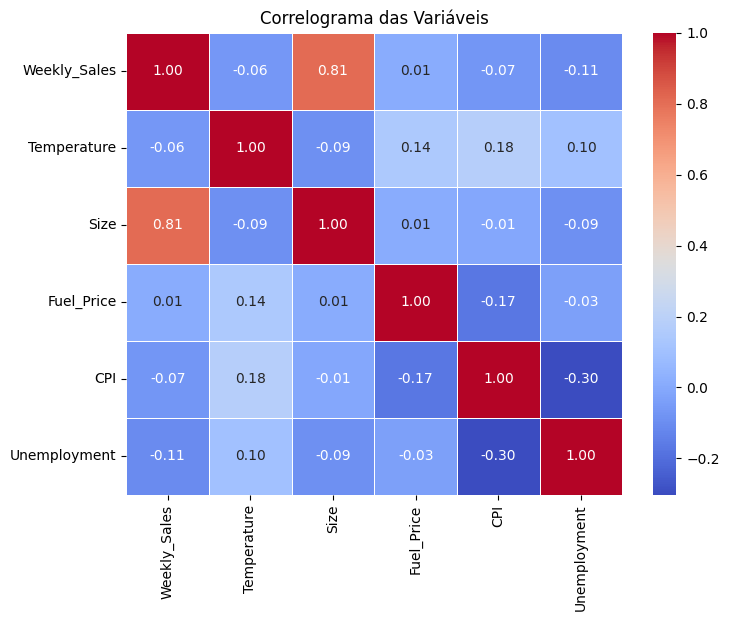

In [185]:
correlation_matrix = sales_store[['Weekly_Sales','Temperature','Size','Fuel_Price','CPI','Unemployment']].corr()
print_corr(correlation_matrix)
#FRACA CORRELAÇÃO ENTRE AS VARIÁVEIS 

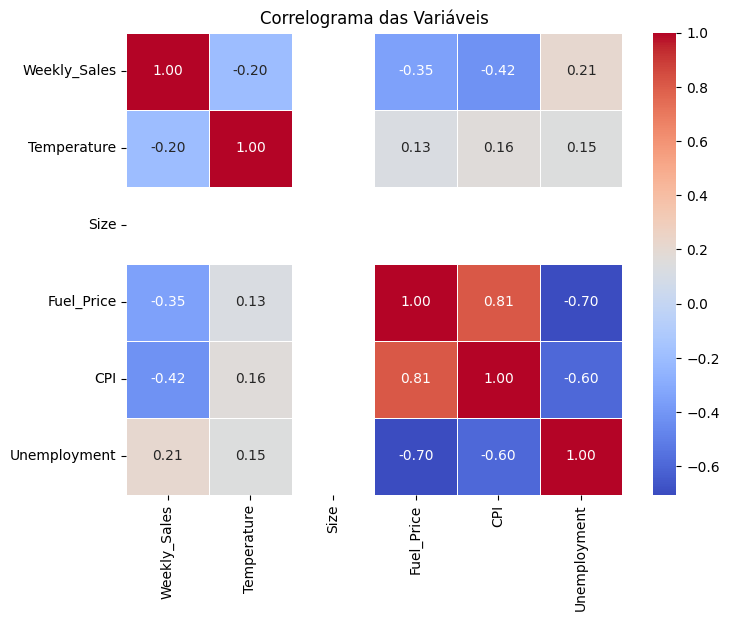

In [186]:
sales_store_s = sales_store[sales_store['Store'] == 14]
correlation_matrix = sales_store_s[['Weekly_Sales','Temperature','Size','Fuel_Price','CPI','Unemployment']].corr()
print_corr(correlation_matrix)
#FRACA CORRELAÇÃO ENTRE AS VARIÁVEIS 

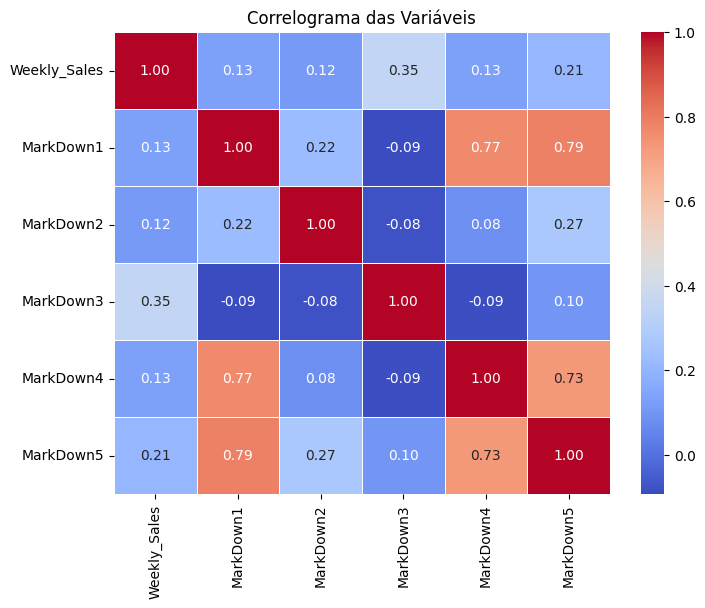

In [187]:
# Calculando a matriz de correlação para holiday = true

sales_store_h = sales_store[sales_store['MarkDown_T'] > 0]
sales_store_h = sales_store[sales_store['IsHoliday_x'] == True]
#correlation_matrix = sales_store_h[['Store','Temperature', 'Weekly_Sales','Size','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']].corr()
correlation_matrix = sales_store_h[['Weekly_Sales','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].corr()
print_corr(correlation_matrix)

In [188]:
#df_sales.head()
print(df_feature.shape)
df_feature_s =  df_feature.groupby(['Date'])[['Temperature','Fuel_Price','CPI','Unemployment']].mean()
print(df_feature_s.shape)
df_feature_s.head()

(8190, 12)
(182, 4)


,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,
2010-02-05,34.037333,2.717844,167.730885,8.619311
2010-02-12,34.151333,2.694022,167.825608,8.619311
2010-02-19,37.719778,2.672067,167.871686,8.619311
2010-02-26,39.243556,2.683933,167.909657,8.619311
2010-03-05,42.917333,2.731200,167.947628,8.619311


In [189]:
sales_store_dept = pd.merge(sales_store_dept, df_feature_s, on=['Date'], how='left')
sales_store_dept.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,34.037333,2.717844,167.730885,8.619311
1,1,1,2010-02-12,46039.49,True,A,151315,34.151333,2.694022,167.825608,8.619311
2,1,1,2010-02-19,41595.55,False,A,151315,37.719778,2.672067,167.871686,8.619311
3,1,1,2010-02-26,19403.54,False,A,151315,39.243556,2.683933,167.909657,8.619311
4,1,1,2010-03-05,21827.90,False,A,151315,42.917333,2.731200,167.947628,8.619311


In [190]:
# sales_store_dept = sales_store_dept[sales_store_dept['Dept'] == 1]
# correlation_matrix = sales_store_dept[['Weekly_Sales','Temperature','Size','Fuel_Price','CPI','Unemployment']].corr()
# print_corr(correlation_matrix)


In [191]:
correlation_matrix['Weekly_Sales'].head()

Weekly_Sales    1.000000
MarkDown1       0.131422
MarkDown2       0.115862
MarkDown3       0.354383
MarkDown4       0.129625
Name: Weekly_Sales, dtype: float64

In [192]:
numeric_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Dicionário para armazenar os resultados
correlations = []

# Agrupando por Store e Dept
grouped = sales_store_dept.groupby('Dept')

# Iterar pelos grupos
for dept, group in grouped:
    # Calculando a matriz de correlação para as colunas numéricas
    corr_matrix = group[numeric_columns].corr()    
    # Salvando os resultados no dicionário
    #corr_matrix['Store'] = store
    corr_matrix['Dept'] = dept
    correlations.append(corr_matrix)


corr_dep = pd.concat(correlations)     

In [193]:
corr_dep = corr_dep.reset_index()

In [194]:
corr_dep[corr_dep['index'] == 'Weekly_Sales'].head()

,index,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Dept
0,Weekly_Sales,1.0,-0.223040,-0.015450,-0.003822,0.014525,1
5,Weekly_Sales,1.0,0.033033,0.003523,0.015907,-0.014223,2
10,Weekly_Sales,1.0,0.242411,0.000928,0.037789,-0.048983,3
15,Weekly_Sales,1.0,0.035400,0.010478,0.027235,-0.028714,4
20,Weekly_Sales,1.0,-0.276000,-0.132625,-0.098425,0.112404,5


In [195]:
corr_dep[corr_dep['index'] == 'Weekly_Sales'].to_csv('correlacoes_dep.csv', sep=';', index=False, decimal=',')

In [196]:
numeric_columns = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Dicionário para armazenar os resultados
correlations = []

# Agrupando por Store e Dept
grouped = sales_store_dept.groupby('Store')

# Iterar pelos grupos
for store, group in grouped:
    # Calculando a matriz de correlação para as colunas numéricas
    corr_matrix = group[numeric_columns].corr()    
    # Salvando os resultados no dicionário
    #corr_matrix['Store'] = store
    corr_matrix['Dept'] = store
    correlations.append(corr_matrix)


corr_store = pd.concat(correlations)    

In [197]:
corr_store = corr_store.reset_index()
corr_store[corr_store['index'] == 'Weekly_Sales'].head()

,index,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Dept
0,Weekly_Sales,1.0,-0.014646,0.012567,0.017548,-0.015141,1
5,Weekly_Sales,1.0,-0.024943,-0.018530,-0.008392,0.009095,2
10,Weekly_Sales,1.0,-0.015567,0.009216,0.014943,-0.013356,3
15,Weekly_Sales,1.0,-0.022295,0.027152,0.036120,-0.030620,4
20,Weekly_Sales,1.0,-0.006504,0.012620,0.020976,-0.019828,5


In [198]:
#criacao do arquivo para analie de correlacoes
corr_store[corr_store['index'] == 'Weekly_Sales'].to_csv('correlacoes_store.csv', sep=';', index=False, decimal=',')